# Importing the required libraries

In [1]:
!pip install tensorflow --upgrade

In [3]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [5]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

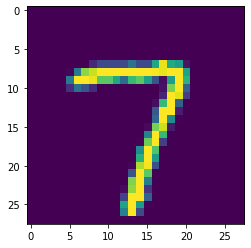

In [7]:
plt.imshow(x_train[5100])     #ploting the index=image

In [8]:
np.argmax(y_train[5100])

0

# Reshaping Dataset

In [9]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [10]:
number_of_classes = 10  #storing the no of classes in a variable

In [11]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [14]:
#create model
model=Sequential ()

In [15]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [16]:
#flatten the dimension of the image
model.add(Flatten())

In [17]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [18]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [19]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [20]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 216s 115ms/step - loss: 0.2739 - accuracy: 0.9499 - val_loss: 0.1067 - val_accuracy: 0.9690
Epoch 2/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0724 - accuracy: 0.9779 - val_loss: 0.0930 - val_accuracy: 0.9718
Epoch 3/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.0899 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0905 - val_accuracy: 0.9763
Epoch 5/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0885 - val_accuracy: 0.9773


# Observing the metrics

In [21]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.08848220854997635, 0.9772999882698059]


# Test The Model

In [22]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 103ms/step
[[5.4288979e-13 6.3697273e-13 8.3372931e-10 6.7059277e-06 1.0848880e-01
  1.1161150e-05 2.1058578e-12 4.7689871e-05 6.4801867e-04 8.9079767e-01]]


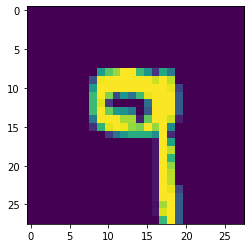

In [23]:
plt.imshow(x_test[6000])

In [24]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [25]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [41]:
# Save the model
model.save('models/mnistCNN.h5')

In [42]:
cd models

/home/wsuser/work/models/models


In [43]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [44]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


In [45]:
!pip install watson-machine-learning-client --upgrade

# Cloud deploy

In [46]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Qxwy3byu83al_Lvmk05S2xcRhHqeQiy_4BxWzPcxuB9A"
}
client = APIClient(credentials)
client

In [47]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/14d571ceb9ec45fe98e6eac22b1fe65f:a2858581-aa42-498f-8101-3cb5eeb52609::',
      'guid': 'a2858581-aa42-498f-8101-3cb5eeb52609',
      'name': 'Watson Machine Learning-vu',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'hdr',
    'scope': {'bss_account_id': '14d571ceb9ec45fe98e6eac22b1fe65f'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '98aa0e16-84dc-4ca5-af32-24752ee67208',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '4c745639eeba4adb8d2f56fd2b57f351',
        'api_key': 'T16lCcwdvCpz4BUdQtm0QnMRtUmxyj_w78zt6doIpCx8',
        'secret_access_key': 'dde37ce0ae17d50ee939028eda9f9c44d20b54bcc2f9f67c',
        'service_id': 'ServiceId-8758d9a8-8ee7-40b6-a087-94e890958f1f'},
       'editor': {'access_key_id': '39926bf2c3864cf1812a88a8c661777b',
        'api_key': '6zyoE

In [48]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [49]:
space_uid = guid_from_space_name(client,'hdr')
print("Space UID = " + space_uid)

Space UID = ad4acd34-c854-43ef-8fa2-0e31b3b4a474


In [50]:
client.set.default_space(space_uid)

'SUCCESS'

In [51]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [52]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [53]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [54]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-07T19:37:53.206Z',
  'id': '9801d0d9-421d-4f4c-95ed-28adca79fbf6',
  'modified_at': '2022-11-07T19:37:56.212Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-667000BZM2',
  'resource_key': 'a31b3b85-c7c6-487f-9492-28baa551ae08',
  'space_id': 'ad4acd34-c854-43ef-8fa2-0e31b3b4a474'},
 'system': {'warnings': []}}

In [55]:
model_id = client.repository.get_model_id(model_details)
model_id

'9801d0d9-421d-4f4c-95ed-28adca79fbf6'

In [56]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/models/models/DigitRecog_IBM_model.tar.gz'

In [57]:
ls

DigitRecog_IBM_model.tar.gz  hdr_deployment.tgz  mnistCNN.h5


# Test Model

In [58]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [59]:
model = load_model("mnistCNN.h5")

In [60]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1rEQ4QsDyr45SbIYkkmEXGolFpDjMBjlc1KmxrsH2V1U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-kvpefjqsoxebrc'
object_key = '4.jpg'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']


In [62]:
img = Image.open(streaming_body_3).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [63]:
img

In [64]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [65]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 112ms/step
[[7.5318508e-14 1.6512175e-07 8.0947671e-10 4.0885627e-08 9.9998868e-01
  1.6610469e-08 2.4431620e-12 7.6923061e-07 4.7200156e-06 5.7087254e-06]]


In [66]:
print(np.argmax(pred, axis=1)) #printing our Labels

[4]
